In [140]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class KNNeibours:

  def __init__(self, distance = lambda x,y: (x-y) @ (x-y), k_neib=3):
    self.distance = distance
    self.k = k_neib

  def fit(self, X, y):
    self.X = X
    self.y = y
    return self

  def predict(self, X):
    return np.array([self.classify(x_i) for x_i in X])

  def classify(self, x):
    distances = [(self.distance(x_i, x), y_i) for x_i,y_i in zip(self.X, self.y)]

    sorted_dist = sorted(distances, key= lambda x: x[0])[1: self.k + 1]

    return Counter([x_i[1] for x_i in sorted_dist]).most_common(1)[0][0]

  def score(self, x, y):
    out = np.array([self.classify(x_i) for x_i in x])
    return np.sum(y - out == 0) / out.size

  def plot_confusion_matrix(self, x, y_true):
    y_pred = self.predict(x)

    labels = np.unique(y_true)

    cm = np.zeros((len(labels), len(labels)), dtype=int)

    label_to_index = {label: index for index, label in enumerate(labels)}

    for true, pred in zip(y_true, y_pred):
        true_idx = label_to_index[true]
        pred_idx = label_to_index[pred]
        cm[true_idx, pred_idx] += 1

    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})

    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

In [141]:
data = pd.read_csv("./WineDataset.csv").fillna("ffill")
data = (data - data.min()) / (data.max() - data.min())
data.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Wine'],
      dtype='object')

In [142]:
data.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [143]:
data.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
data.dtypes

Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                       float64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                         float64
Wine                            float64
dtype: object

In [145]:
[len(set(data[column].values)) for column in data.columns], data.shape

([126, 133, 79, 63, 53, 97, 132, 39, 101, 132, 78, 122, 121, 3], (178, 14))

In [146]:
n = 3
rand_columns = np.random.choice(data.drop(columns=["Wine"]).columns, n)
rand_columns

array(['Color intensity', 'Total phenols', 'Flavanoids'], dtype=object)

In [147]:
y = data["Wine"].values
x = data[rand_columns].values

In [148]:
KNNeibours().fit(x,y).score(x,y)

np.float64(0.949438202247191)

In [149]:
selected_columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']

In [150]:
y = data["Wine"].values
x = data[selected_columns].values
KNNeibours().fit(x,y).score(x,y)

np.float64(0.9662921348314607)

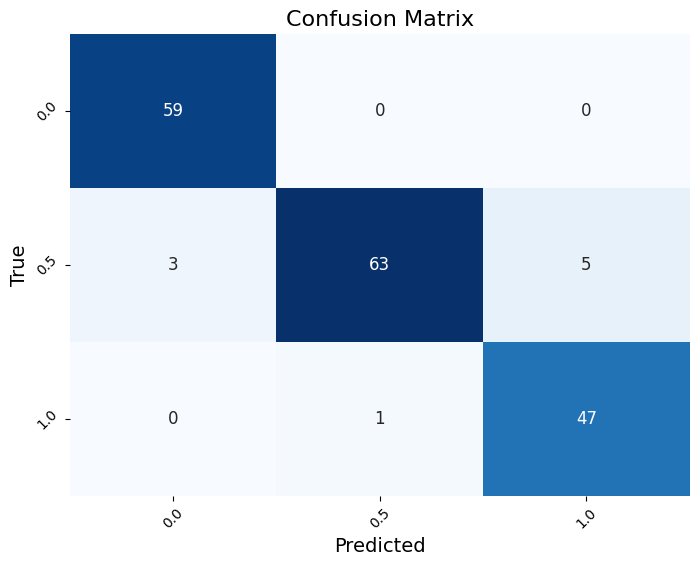

In [151]:
KNNeibours(k_neib=5).fit(x,y).plot_confusion_matrix(x,y)